In [22]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [23]:
#1.### Part 1 - Data Gathering using APIs
url = "https://data.nashville.gov/resource/2u6v-ujjs.json?$where=incident_reported between '2022-01-01' and '2022-09-30' AND offense_description='BURGLARY- AGGRAVATED'&$limit=2000"
response = requests.get(url)
data = response.json()
df_incidents = pd.DataFrame.from_records(data)
df_incidents



,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,I,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN
4,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,20220417748_11,20220417748,D,DISPATCHED,O,OPEN,Open,2022-08-22T05:40:00.000,2022-08-22T21:24:00.000,PENN MEADE WAY,...,I,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}",NaN,NaN,NaN
1355,20220462314_11,20220462314,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-13T17:00:00.000,2022-09-15T02:04:00.000,1524 1524,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.744, 36....",NaN,NaN,37206
1356,20220397543_11,20220397543,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-08-11T18:00:00.000,2022-08-11T22:47:00.000,930 930,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.835, 36....",NaN,NaN,37209
1357,20220487005_11,20220487005,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-27T19:16:00.000,2022-09-27T22:46:00.000,400 400,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.794, 36....",NaN,NaN,37207


In [47]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   primary_key                  1359 non-null   object  
 1   incident_number              1359 non-null   object  
 2   report_type                  1359 non-null   object  
 3   report_type_description      1348 non-null   object  
 4   incident_status_code         1359 non-null   object  
 5   incident_status_description  1359 non-null   object  
 6   investigation_status         1359 non-null   object  
 7   incident_occurred            1359 non-null   object  
 8   incident_reported            1359 non-null   object  
 9   incident_location            1351 non-null   object  
 10  latitude                     1352 non-null   object  
 11  longitude                    1352 non-null   object  
 12  location_code                1359 non-null   object  
 13  loc

In [30]:
df_incidents[['report_type','incident_reported','offense_description','latitude', 'longitude']]

,report_type,incident_reported,offense_description,latitude,longitude
0,D,2022-04-08T11:52:00.000,BURGLARY- AGGRAVATED,36.17,-86.8
1,D,2022-03-18T06:51:00.000,BURGLARY- AGGRAVATED,36.13,-86.77
2,D,2022-01-19T23:48:00.000,BURGLARY- AGGRAVATED,36.04,-86.66
3,D,2022-01-24T06:57:00.000,BURGLARY- AGGRAVATED,36.13,-86.86
4,D,2022-01-21T16:25:00.000,BURGLARY- AGGRAVATED,36.15,-86.78
...,...,...,...,...,...
1354,D,2022-08-22T21:24:00.000,BURGLARY- AGGRAVATED,36.24,-86.7
1355,D,2022-09-15T02:04:00.000,BURGLARY- AGGRAVATED,36.194,-86.744
1356,D,2022-08-11T22:47:00.000,BURGLARY- AGGRAVATED,36.16,-86.835
1357,D,2022-09-27T22:46:00.000,BURGLARY- AGGRAVATED,36.214,-86.794


In [31]:
df_incidents['geometry'] = gpd.points_from_xy(df_incidents['longitude'], df_incidents['latitude'])

df_incidents.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code,geometry
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN,POINT (-86.80000 36.17000)
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN,POINT (-86.77000 36.13000)
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,POINT (-86.66000 36.04000)
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN,POINT (-86.86000 36.13000)
4,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN,POINT (-86.78000 36.15000)


# 2-A
Using the [2020 American Community Survey API](https://www.census.gov/data/developers/data-sets/acs-5year.html), 
obtain, for each census tract, the population (B01001_001E in the detailed tables) 
and the median income (S1901_C01_012E in the subject tables). 
Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37. 

In [25]:
#API Key 1a7d8390fe5832389d167413a246419f81f8fc0d
#url_census = "	https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=us:*&key=1a7d8390fe5832389d167413a246419f81f8fc0d"
url_census = "https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=state:47&in=county:037&key=1a7d8390fe5832389d167413a246419f81f8fc0d"
response_census = requests.get(url_census)
csData = response_census.json()
census_df = pd.DataFrame.from_records(csData)
census_df



,0,1,2,3,4
0,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [43]:
# census_df has column names as index, make the first row as columns names and then delete first row
census_df = census_df.rename(columns=census_df.iloc[0])
census_df = census_df.drop(0)
census_df


,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [42]:
#2 B-  the median income (S1901_C01_012E in the subject tables
URL_medIncome = 'https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,S0101_C01_012E&for=tract:*&in=state:47&in=county:037&key=1a7d8390fe5832389d167413a246419f81f8fc0d'
response_medIncome = requests.get(URL_medIncome)
medIncomeData = response_medIncome.json()
medIncome_df = pd.DataFrame.from_records(medIncomeData)
medIncome_df

,0,1,2,3,4
0,NAME,S0101_C01_012E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",239,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",139,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",288,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",252,47,037,019105
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",75,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",155,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",79,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",114,47,037,018905


In [44]:
# medIncome_df has column names as index, make the first row as columns names and then delete first row
medIncome_df = medIncome_df.rename(columns=medIncome_df.iloc[0])
medIncome_df = medIncome_df.drop(0)
medIncome_df

,NAME,S0101_C01_012E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",239,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",139,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",288,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",252,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",244,47,037,019106
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",75,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",155,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",79,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",114,47,037,018905


In [57]:
# Merge the DataFrame and append _remove to second df column names(so that we can delete this duplicate columns in next step)

census_medIncome_df = pd.merge(left = census_df, 
         right = medIncome_df, 
         left_on = 'tract', 
         right_on = 'tract',
        suffixes=('', '_remove'))
census_medIncome_df

,NAME,B01001_001E,state,county,tract,NAME_remove,S0101_C01_012E,state_remove,county_remove
0,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004,"Census Tract 190.04, Davidson County, Tennessee",239,47,037
1,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007,"Census Tract 190.07, Davidson County, Tennessee",139,47,037
2,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008,"Census Tract 190.08, Davidson County, Tennessee",288,47,037
3,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105,"Census Tract 191.05, Davidson County, Tennessee",252,47,037
4,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106,"Census Tract 191.06, Davidson County, Tennessee",244,47,037
...,...,...,...,...,...,...,...,...,...
169,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901,"Census Tract 189.01, Davidson County, Tennessee",75,47,037
170,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902,"Census Tract 189.02, Davidson County, Tennessee",155,47,037
171,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904,"Census Tract 189.04, Davidson County, Tennessee",79,47,037
172,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905,"Census Tract 189.05, Davidson County, Tennessee",114,47,037


In [58]:
# remove the duplicate columns
census_medIncome_df.drop([i for i in census_medIncome_df.columns if 'remove' in i],
               axis=1, inplace=True)

In [59]:
census_medIncome_df

,NAME,B01001_001E,state,county,tract,S0101_C01_012E
0,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004,239
1,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007,139
2,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008,288
3,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105,252
4,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106,244
...,...,...,...,...,...,...
169,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901,75
170,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902,155
171,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904,79
172,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905,114


In [ ]:

### Part 2 - Spatial Joining and Data Merging

#3. Download the 2020 census tract shapefiles for Tennessee 
#from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html. 
#(The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract 
#in which each burglary incident occurred. 
#AK: Down;pad the files from https://www.census.gov/cgi-bin/geo/shapefiles/index.php, 
#        Select Year 2020
#        Select a layer type = Cencus Tracts
#        Then Submit and Pick Tennessee from dropdown
# read file tl_2020_47_tract.shp with geospatial
        

In [33]:
#tract = gpd.read_file('../tl_2020_47_tract')
tract = gpd.read_file('data/')
tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,175,925200,47175925200,9252,Census Tract 9252,G5020,S,227429512,1667739,+35.7438100,-085.4940227,"POLYGON ((-85.61516 35.76106, -85.61509 35.761..."
1,47,175,925000,47175925000,9250,Census Tract 9250,G5020,S,480712883,1225717,+35.6695378,-085.4220628,"POLYGON ((-85.60513 35.70854, -85.60511 35.708..."
2,47,003,950201,47003950201,9502.01,Census Tract 9502.01,G5020,S,121774227,0,+35.6517480,-086.5575518,"POLYGON ((-86.64406 35.64029, -86.64375 35.642..."
3,47,003,950202,47003950202,9502.02,Census Tract 9502.02,G5020,S,110617191,700793,+35.5845755,-086.5790796,"POLYGON ((-86.66377 35.58189, -86.66367 35.582..."
4,47,093,003300,47093003300,33,Census Tract 33,G5020,S,5860088,229299,+36.0020586,-083.8371218,"POLYGON ((-83.86208 35.99255, -83.86207 35.992..."


<AxesSubplot: >

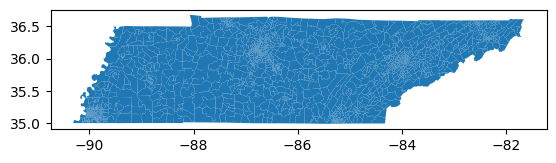

In [34]:
tract.plot()

In [ ]:
#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry

In [60]:
df_incidents_geo = gpd.GeoDataFrame(df_incidents, 
                           crs = tract.crs, 
                           geometry = df_incidents['geometry'])


<AxesSubplot: >

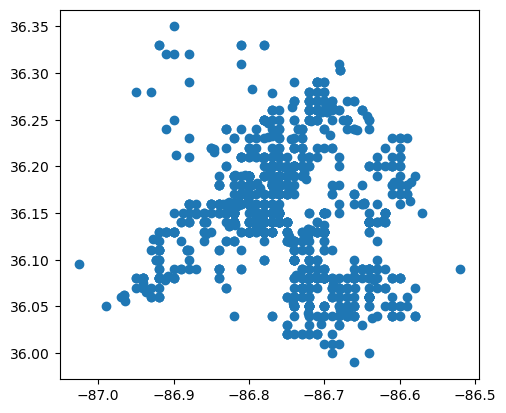

In [37]:
df_incidents_geo.plot()

# APIs

An Application Programming Interface, or API, is a structured way to retrieve data from a website. Using an API is safer and easier than something like webscraping, since what you get back is already in a usable format. Many organizations use APIs like:
- Government organizations ([US Government](https://www.data.gov/developers/apis))
- Large companies ([Twitter API](https://developer.twitter.com/en/docs))
- News organizations ([NYT API](https://developer.nytimes.com/))
- And [many more](https://github.com/public-apis/public-apis)

If you type `how to use an api in python` in google, you get back many articles walking through how to use an API. It is a well documented and useful tool to be familiar with.

## Basic API Usage

Let's start by using the Numbers API, an API which provides interesting facts about numbers.

With any API, you should start by inspecting the documentation. For the Numbers API, the documentation is located here: http://numbersapi.com

We will be using the `requests` package to make a `GET` request to an API. Similar to webscraping, APIs require an endpoint to tell python where to send the request.

When using an API, the first thing we need to know is the expected URL structure. In this case, it is http://numbersapi.com/number/type where number is the number for which we want an interesting fact and type indicates which type of fact we want. Note that type can be omitted, and it will default to trivia.

In [ ]:
endpoint = 'http://numbersapi.com/8'

response = requests.get(endpoint)

Let's check the response. If all is well, we should have a 200 response.

In [ ]:
response

To access the content of the response, we can look at the `text` attribute.

In [ ]:
response.text

What if we want to be able to easily change the number that we want to retrieve. For this, we can make use of an f-string. 

In [ ]:
number = 95

endpoint = f'http://numbersapi.com/{number}'

response = requests.get(endpoint)

response.text

This API also allows for batch requests: http://numbersapi.com#batching

In [ ]:
number_range = "1..10"

endpoint = f'http://numbersapi.com/{number_range}'

response = requests.get(endpoint)

We can look at the response as text.

In [ ]:
response.text

However, it will be easier to work with as a json. We can use the `json` method to convert the results to a dictionary.

In [ ]:
res = response.json()
res

Then, we can access the individual entries by passing in the correct key.

In [ ]:
res['5']

Finally, notice that we can ask for a fact about a random number.

In [ ]:
endpoint = 'http://numbersapi.com/random'

response = requests.get(endpoint)

response.text

We can specify a minimum and maximum for these random numbers: http://numbersapi.com#min-and-max

#### Parameters

Parameters are specific to each API and indicate what information you want back. These can be compared to the various ways you slice a table or df to get just the subset you want. Some parameters are required, others are optional. Always look at the documentation to know what parameters you should include and what are possible values for each one. When using parameters for an API call, you can do the following:

1. Make an empty dictionary for the `params` variable
2. Look at the documentation to know what parameters you should include, add these as **keys** to the dictionary
3. Add the appropriate values for each parameter as the **values** for the dictionary

For example, let's get a fact about a random number between 500 and 600

In [ ]:
endpoint = 'http://numbersapi.com/random'

params = {
    'min': 500,
    'max': 600
}

response = requests.get(endpoint, params = params)

response.text

### NASA API and API Keys

Now, let's work with the NASA API: https://api.nasa.gov/

One of the main ways APIs maintain security is by the use of some form of authentication, such as an API key. An API key can be obtained in a number of ways, depending on the API, and is a way for the application to know who you are and provides you secure access to the data.

To work with the NASA API, you'll need to create an API key.

1. Scroll down and enter your First Name, Last Name, and email to generate an API key
2. Copy the API key into the keys.json file.

**DO NOT SHARE YOUR API KEYS OR PUT THEM IN A PUBLIC PLACE LIKE GITHUB**

API keys should be stored securely on your computer and removed from any code or documents you share.

Now, we can safely load your key into a variable using the json library.

In [ ]:
import json

In [ ]:
with open('keys.json') as fi:
    credentials = json.load(fi)

In [ ]:
api_key = credentials['api_key']

1. Look at the different available APIs in the `Browse APIs` tab
2. Click on the **Asteroids - NeoWs**
3. Under **Neo - Feed**, copy the second line into the endpoint variable below as a string and delete the last `?`

In [ ]:
0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe

In [ ]:
api_key

In [ ]:
endpoint = 'https://api.nasa.gov/neo/rest/v1/feed?'

Fill in the parameters dictionary below to retrieve information on all NeoWs between January 1, 2022 and January 7, 2022. (Be sure the include your api key as a parameter).

In [ ]:
params = {
    'start_date':'2022-01-01',
    'end_date': '2022-01-07',
    'api_key': api_key

}

You now have all the pieces to make an API request

In [ ]:
response = requests.get(endpoint, params = params)

See what was saved to `response`

In [ ]:
response

This API returns the results as a json, so we'll access them using the `json` method.

In [ ]:
res = response.json()
res

In [ ]:
res.keys()

The information that we're interested in is located under `near_earth_objects`.

In [ ]:
res['near_earth_objects']

In [ ]:
res['near_earth_objects'].keys()

**Question:** How many near earth objects were there on January 3?

In [ ]:
# Your Code Here
len(res['near_earth_objects']['2022-01-03'])


In [ ]:
res['near_earth_objects']['2022-01-03']


**Question:** Is the first returned result for January 3 potentially hazardous (as indicated by the `is_potentially_hazardous_asteroid` field)?

In [ ]:
# Your Code Here

**Question:** What was the relative velocity, in miles per hour of the first object returned for January 3?

In [ ]:
# Your Code Here

The for loop below iterates over the data returned and pulls out information for each asteroid. It then saves the information to lists, that are used for making a scatter plot of the asteroids.

In [ ]:
max_diam = []
hazardous = []
miss_dist = []
for day, objs in res['near_earth_objects'].items():
    for obj in objs:
        max_diam.append(float(obj['estimated_diameter']['miles']['estimated_diameter_max']))
        hazardous.append(obj['is_potentially_hazardous_asteroid'])
        miss_dist.append(float(obj['close_approach_data'][0]['miss_distance']['miles']))

plt.figure(figsize = (17, 10))
plt.scatter(max_diam, miss_dist, c = hazardous)
plt.xlabel('max diameter (miles)')
plt.ylabel('miss distance (miles)');

If you want to work with the response from an API using _pandas_, you'll want to convert it to a DataFrame. In some circumstances, you can easily convert a json to a DataFrame, but in other cases, you have to do a little bit of work.

In [ ]:
import pandas as pd

The easiest case is when you have a list of dictionaries. Here, you can simply use the `DataFrame` constructor. Let's see how this works using one of the days. If you wanted to get all of the results into a single DataFrame, you could iterate through and concatenate. 

In [ ]:
pd.DataFrame(response.json()['near_earth_objects']['2022-01-07']).head(2)

You'll notice that we still have dictionaries in some of the columns. This can be remedied using the `json_normalize` function.

In [ ]:
pd.json_normalize(response.json()['near_earth_objects']['2022-01-07']).head(2)

This almost does it, but the `close_approach_data` column contains a list, which `json_normalize` can't handle. To fix this, we can use the `explode` method which will unpack the list across multiple columns, if needed.

In [ ]:
response_df = pd.json_normalize(response.json()['near_earth_objects']['2022-01-07'])
response_df.explode('close_approach_data').head(2)

Once exploded, you can use the `json_normalize` function again.

In [ ]:
pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data']).head(2)

And finally, you can concatenate the two pieces together.

In [ ]:
pd.concat([
    response_df.explode('close_approach_data').drop(columns = ['close_approach_data']),
    pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data'])
], axis = 1).head(2)

Let's try another `endpoint` from NASA. This time copy the endpoint from the **APOD** (Astronomy Picture of the Day) section.

Fill in the endpoint and parameters in order to retrieve the image for January 1, 2019.

In [ ]:
endpoint = ''

params = {

}

In [ ]:
response = requests.get(endpoint, params = params)

In [ ]:
response

In [ ]:
response.json()

Finally, let's grab the image url so that we can retrieve the actual image.

In [ ]:
image_response = requests.get(response.json()['url'])

For image responses, we don't want to look at the text or json, but instead take the content. We'll now use the `.content` attribute from the response to render an image.

In [ ]:
from IPython.display import Image

In [ ]:
Image(image_response.content)